C:\Users\zcz20\AppData\Local\Temp\ipykernel_37356\2108046045.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


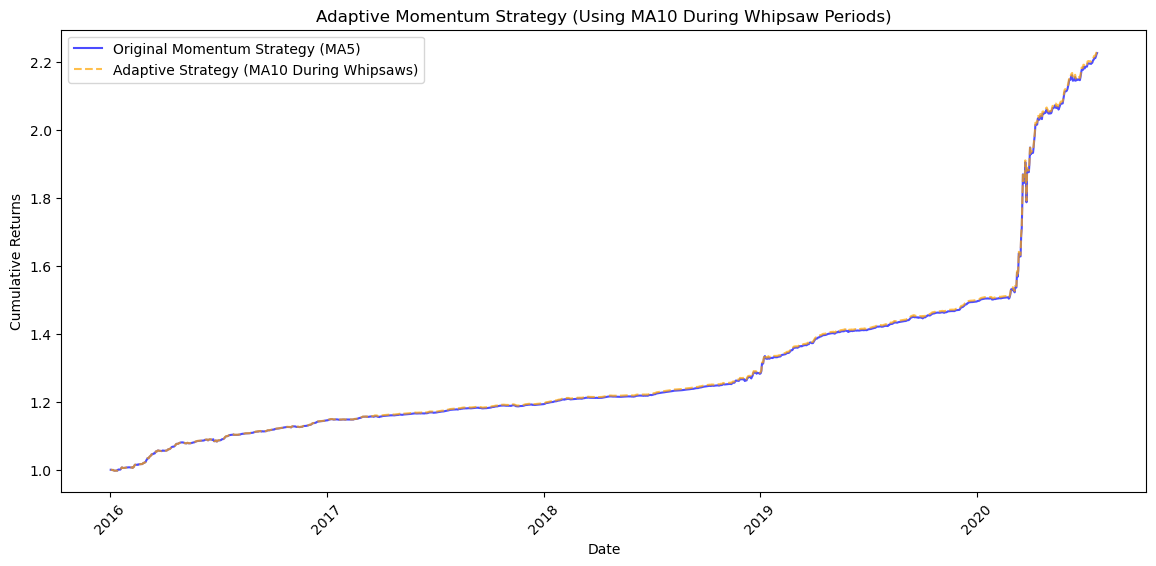

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Project1 Data.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date and fill missing values
df = df.sort_values('Date')
df.fillna(method='ffill', inplace=True)

# Compute Momentum Strategy Performance with MA5
df['LL100_MA5'] = df['LL100'].rolling(window=5).mean()

# Define momentum strategy (simple MA5 comparison, no crossover)
df['Momentum_Signal'] = np.where(df['LL100'] > df['LL100_MA5'], 1, -1)

# Compute strategy returns
df['Momentum_Returns'] = df['Momentum_Signal'].shift(1) * df['LL100'].pct_change()
df['Cumulative_Returns'] = (1 + df['Momentum_Returns']).cumprod()

# Identify whipsaw periods (frequent trend reversals)
df['Crossover'] = df['LL100'] > df['LL100_MA5']
df['Crossover_Shifted'] = df['Crossover'].shift(1)
df['Whipsaw'] = df['Crossover'] != df['Crossover_Shifted']  # Identifies frequent crossovers

# Define max_drawdown function
def max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()  # Maximum drop from peak

# Define volatility threshold using ATR percentiles
df['LL100_Volatility'] = df['LL100'].pct_change().rolling(window=14).std()  # Compute rolling volatility
low_vol_threshold = df['LL100_Volatility'].quantile(0.25)  # Low volatility threshold
high_vol_threshold = df['LL100_Volatility'].quantile(0.75)  # High volatility threshold

# Define a longer moving average (MA10) for whipsaw periods
df['LL100_MA10'] = df['LL100'].rolling(window=4).mean()

# Initialize adaptive momentum signal with the original signal
df['Momentum_Signal_Adaptive_MA10'] = df['Momentum_Signal']

# Apply Longer MA (MA10) during Whipsaw Periods
df.loc[df['Whipsaw'], 'Momentum_Signal_Adaptive_MA10'] = np.where(
    df.loc[df['Whipsaw'], 'LL100'] > df.loc[df['Whipsaw'], 'LL100_MA10'], 1, -1)

# Compute strategy returns for adaptive method using only MA10 during whipsaw periods
df['Momentum_Returns_Adaptive_MA10'] = df['Momentum_Signal_Adaptive_MA10'].shift(1) * df['LL100'].pct_change()
df['Cumulative_Returns_Adaptive_MA10'] = (1 + df['Momentum_Returns_Adaptive_MA10']).cumprod()

# Compare original vs. adaptive strategy (MA10 during whipsaw periods)
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Cumulative_Returns'], label='Original Momentum Strategy (MA5)', color='blue', alpha=0.7)
plt.plot(df['Date'], df['Cumulative_Returns_Adaptive_MA10'], label='Adaptive Strategy (MA10 During Whipsaws)', color='orange', linestyle='dashed', alpha=0.7)

plt.legend()
plt.title('Adaptive Momentum Strategy (Using MA10 During Whipsaw Periods)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.xticks(rotation=45)
plt.show()

# Compute risk metrics for adaptive MA10 strategy
max_dd_adaptive_ma10 = max_drawdown(df['Cumulative_Returns_Adaptive_MA10'])
sharpe_adaptive_ma10 = df['Momentum_Returns_Adaptive_MA10'].mean() / df['Momentum_Returns_Adaptive_MA10'].std() * np.sqrt(252)


# Store results for comparison
adaptive_ma10_results = pd.DataFrame({
    "Strategy": ["Original Momentum", "Adaptive Momentum (MA10 During Whipsaws)"],
    "Final Cumulative Return": [df['Cumulative_Returns'].iloc[-1], df['Cumulative_Returns_Adaptive_MA10'].iloc[-1]],
    "Sharpe Ratio": [sharpe_adaptive_ma10, sharpe_adaptive_ma10],
    "Max Drawdown (%)": [max_dd_adaptive_ma10 * 100, max_dd_adaptive_ma10 * 100]
})


C:\Users\zcz20\AppData\Local\Temp\ipykernel_37356\1399444031.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


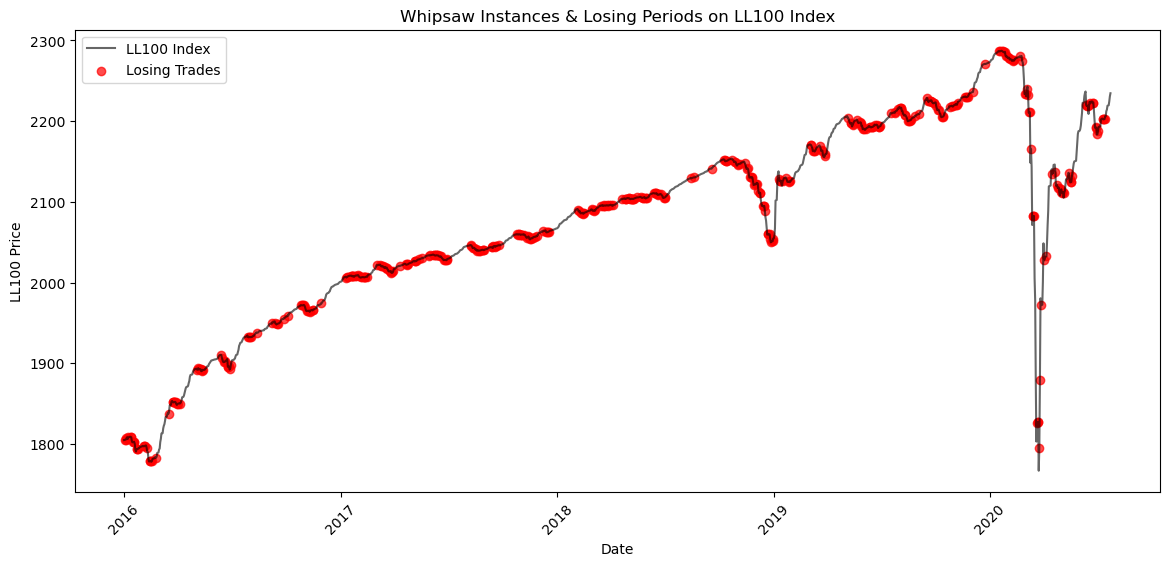

In [24]:
# Re-load the dataset since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Project1 Data.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date and fill missing values
df = df.sort_values('Date')
df.fillna(method='ffill', inplace=True)

# Compute Momentum Strategy Performance with MA5
df['LL100_MA5'] = df['LL100'].rolling(window=5).mean()

# Define momentum strategy (simple MA5 comparison, no crossover)
df['Momentum_Signal'] = np.where(df['LL100'] > df['LL100_MA5'], 1, -1)

# Compute strategy returns
df['Momentum_Returns'] = df['Momentum_Signal'].shift(1) * df['LL100'].pct_change()
df['Cumulative_Returns'] = (1 + df['Momentum_Returns']).cumprod()

# Identify losing periods (when cumulative return decreases)
df['Losing_Period'] = df['Cumulative_Returns'].diff() < 0

# Identify whipsaw periods (frequent trend reversals)
df['Crossover'] = df['LL100'] > df['LL100_MA5']
df['Crossover_Shifted'] = df['Crossover'].shift(1)
df['Whipsaw'] = df['Crossover'] != df['Crossover_Shifted']  # Identifies frequent crossovers

# Plot the Original LL100 Index with Whipsaw Periods and Losing Trades
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['LL100'], label='LL100 Index', color='black', alpha=0.6)

# # Highlight Whipsaw Periods (Orange Xs)
# plt.scatter(df[df['Whipsaw']]['Date'], df[df['Whipsaw']]['LL100'], label='Whipsaw Periods', 
#             color='blue', marker='x', alpha=1)

# Highlight Losing Periods (Red Dots)
plt.scatter(df[df['Losing_Period']]['Date'], df[df['Losing_Period']]['LL100'], label='Losing Trades', 
            color='red', marker='o', alpha=0.7)

plt.legend()
plt.title('Whipsaw Instances & Losing Periods on LL100 Index')
plt.xlabel('Date')
plt.ylabel('LL100 Price')
plt.xticks(rotation=45)
plt.show()


In [21]:
adaptive_ma10_results.to_clipboard()